In [ ]:
#To upload the Dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras import backend as K
#for model Building
#Sequential is to build the model layer by layer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
#Dense is used to represents fully connected Layer
from keras.layers import Dense, Dropout, Activation, Flatten
import os
import pathlib

In [ ]:
#load the Dataset
tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
#Split the Dataset into Train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
x_train[0]

In [ ]:
import matplotlib.pyplot as plt
def show_samples(data, labels):
	plt.subplots(figsize=(10, 10))
	for i in range(12):
		plt.subplot(3, 4, i+1)
		k = np.random.randint(0, data.shape[0])
		plt.title(labels[k])
		plt.imshow(data[k])
	plt.show()
show_samples(x_train, y_train)

In [ ]:
#assign the batch_size
batchsize = 128
#assign the number of classes
num_classes = 100
#define epoch
epoch= 10
#define rows and columns
img_rows, img_cols = 32, 32

pre-prossesing

In [ ]:
#Shape of the x_train data
x_train.shape

In [ ]:
#Shape of the x_test data
x_test.shape

In [ ]:
 # reshape the training datas and testing data
new_shape = (50000, 32*32*3)
new_shape1 = (10000, 32*32*3)
x_train_reshaped = x_train.reshape(new_shape)
x_test_reshaped = x_test.reshape(new_shape1)


In [ ]:
#Sequential is to build the model layer by layer
model = tf.keras.models.Sequential()
#First layer
model.add(Conv2D(128, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Hidden layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#dense is used to represents fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
#To show the denmenssions
model.summary()

In [ ]:
#Compile the model to train the datas
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [ ]:
#Converting the numerical to float
x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped= x_test_reshaped.astype('float32')

In [ ]:
x_train_reshaped

In [ ]:
#Divide the pixels range form 0 to 1
x_train_reshaped /= 255
x_test_reshaped /= 255

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [ ]:
print(x_test_reshaped.shape)
print(y_test_one_hot.shape)
print(x_train_reshaped.shape)
print(y_train_one_hot.shape)

In [ ]:
model.fit(x_train, y_train_one_hot, batch_size=batchsize , epochs=epoch, validation_data=(x_test, y_test_one_hot))


In [ ]:
model.save('Cifar__CNN.h5')

In [ ]:
p=model.predict(x_train)
p

In [ ]:
p[0]

In [ ]:
arr=np.argmax(p[1])

In [ ]:
arr

In [ ]:
y_train[1][0]

In [ ]:
model.save('cifar_Cnn.h5')

In [31]:
from PIL import Image

In [36]:
image_array = x_train[1]

In [37]:
image = Image.fromarray(np.uint8(image_array))

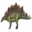

In [38]:
image.show()

In [39]:
# Save the image to a file
image.save("restored_image.png")
